In [46]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [23]:
from ast import literal_eval

import pandas as pd

from scipy.stats import spearmanr, ttest_ind

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap, to_rgb
import seaborn as sns

# import bokeh
# from bokeh.io import show, export_svg, export_png, output_notebook
# from bokeh.plotting import show, figure
# from bokeh.themes.theme import Theme

# import holoviews as hv
# from holoviews import opts, dim

# # for html to png
# from selenium import webdriver
# from selenium.webdriver.firefox.service import Service
# from selenium.webdriver.firefox.options import Options

from SSMuLA.landscape_global import LIB_INFO_DICT
# from SSMuLA.de_simulations import DE_TYPES
from SSMuLA.zs_analysis import ZS_OPTS, ZS_COMB_OPTS
from SSMuLA.vis_summary import ZS_METRICS, ZS_COLOR_MAP_APPENDED, ZS_OPTS_APPENDED
# from SSMuLA.get_corr import LANDSCAPE_ATTRIBUTES, val_list, zs_list
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE, save_plt
# from SSMuLA.util import checkNgen_folder


# get msa factors
from SSMuLA.zs_data import EV_META
# from SSMuLA.landscape_global import get_file_name, n_mut_cutoff_dict
# from SSMuLA.de_simulations import DE_TYPES
from SSMuLA.zs_analysis import ZS_OPTS, ZS_COMB_OPTS, ZS_OPTS_LEGEND
from SSMuLA.vis_summary import N_SAMPLE_LIST, N_MUT_SUBS, ZS_METRICS, ZS_N_MUTS
# from SSMuLA.vis import LIB_COLORS, save_bokeh_hv
# from SSMuLA.util import checkNgen_folder

%matplotlib inline

# Custom colormap for the MSE row, using greens
cmap_mse = LinearSegmentedColormap.from_list(
    "mse_cmap_r", ["#FFFFFF", "#9bbb59"][::-1], N=100
)  # dark to light green

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list(
    "bwg",
    [
        PRESENTATION_PALETTE_SATURATE["blue"],
        "white",
        PRESENTATION_PALETTE_SATURATE["green"],
    ],
    N=100,
)

custom_cmap_r = LinearSegmentedColormap.from_list(
    "bwg_r",
    [
        sns.dark_palette("seagreen").as_hex()[-1],
        "white",
        sns.color_palette("Blues").as_hex()[-1],
    ],
    N=100,
)

de_metrics = ["mean_all", "fraction_max"]

simple_des = {
    "recomb_SSM": "Recomb",
    "single_step_DE": "Single step",
    "top96_SSM": "Top96 recomb",
}

five_zs = {
 'ed_score': PRESENTATION_PALETTE_SATURATE["orange"],
 'Triad_score': PRESENTATION_PALETTE_SATURATE["blue"],
 'ev_score': PRESENTATION_PALETTE_SATURATE["green"],
 'esm_score': PRESENTATION_PALETTE_SATURATE["purple"],
 'esmif_score': PRESENTATION_PALETTE_SATURATE["yellow"]}

In [4]:
merge_csv = "results/corr_all/384/boosting|ridge-top96/actcut-1/merge_all.csv"
corr_csv = "results/corr_all/384/boosting|ridge-top96/actcut-1/corr.csv"
zs_csv = "results/zs_sum_2/min0/zs_stat_scale2max.csv"
sub_dir = "results/style_dfs/actcut-1"

n_mut = "all"
metricr = "rho"

In [5]:
merge_df = pd.read_csv(merge_csv)
zs_df = pd.read_csv(zs_csv)
zs_df

,lib,n_mut,scale_type,ed_score,Triad_score,ev_score,esm_score,esmif_score,Triad-ev_score,Triad-esm_score,struc-comb_score,msanoif-comb_score,msa-comb_score,structnmsa-comb_score
0,DHFR,all,max,"{'rho': 0.25115364784680605, 'ndcg': 0.9148031...","{'rho': 0.017800602737355977, 'ndcg': 0.874706...","{'rho': 0.3396500541186067, 'ndcg': 0.94705812...","{'rho': 0.2997147334642927, 'ndcg': 0.93412887...","{'rho': 0.3420102237927515, 'ndcg': 0.94530250...","{'rho': 0.23090332337249703, 'ndcg': 0.9008350...","{'rho': 0.20424667302483043, 'ndcg': 0.8962477...","{'rho': 0.21873645360229155, 'ndcg': 0.9010558...","{'rho': 0.3329620349497645, 'ndcg': 0.94020086...","{'rho': 0.35054254084284997, 'ndcg': 0.9449015...","{'rho': 0.3152181002051771, 'ndcg': 0.92293221..."
1,GB1,all,max,"{'rho': 0.1449275437059576, 'ndcg': 0.68739614...","{'rho': 0.2882819770014877, 'ndcg': 0.76404913...","{'rho': 0.18950853197890194, 'ndcg': 0.7215575...","{'rho': 0.08033543850645883, 'ndcg': 0.7016796...","{'rho': 0.29349648314848165, 'ndcg': 0.7536404...","{'rho': 0.27981217554750343, 'ndcg': 0.7521803...","{'rho': 0.21772991088329988, 'ndcg': 0.7424266...","{'rho': 0.3165424232001679, 'ndcg': 0.76648219...","{'rho': 0.14175871216515606, 'ndcg': 0.7115697...","{'rho': 0.21368724000610942, 'ndcg': 0.7341220...","{'rho': 0.2591091741511955, 'ndcg': 0.74743562..."
2,ParD2,all,max,"{'rho': 0.2975201855343516, 'ndcg': 0.90289769...","{'rho': 0.227369930630083, 'ndcg': 0.843745897...","{'rho': 0.44024813481122116, 'ndcg': 0.9153065...","{'rho': 0.508268170548332, 'ndcg': 0.945767955...","{'rho': 0.5471325552647406, 'ndcg': 0.94232035...","{'rho': 0.43039880945001013, 'ndcg': 0.9131562...","{'rho': 0.4530158707654119, 'ndcg': 0.92325217...","{'rho': 0.4297313521097985, 'ndcg': 0.90643478...","{'rho': 0.506389726205563, 'ndcg': 0.943912955...","{'rho': 0.55799750230795, 'ndcg': 0.9518303944...","{'rho': 0.5460244706565965, 'ndcg': 0.94510410..."
3,ParD3,all,max,"{'rho': 0.4566272705430452, 'ndcg': 0.95352503...","{'rho': 0.2845006278410668, 'ndcg': 0.88616858...","{'rho': 0.4605763343621608, 'ndcg': 0.95588218...","{'rho': 0.5830921549165025, 'ndcg': 0.97249924...","{'rho': 0.6008140740078155, 'ndcg': 0.94168720...","{'rho': 0.5383799824821464, 'ndcg': 0.93586670...","{'rho': 0.620348950610801, 'ndcg': 0.946515949...","{'rho': 0.4805622322100395, 'ndcg': 0.91576427...","{'rho': 0.5429575450092126, 'ndcg': 0.96828106...","{'rho': 0.6109746458267433, 'ndcg': 0.96292848...","{'rho': 0.6497908043137078, 'ndcg': 0.95470974..."
4,TrpB3A,all,max,"{'rho': 0.1465185000668908, 'ndcg': 0.67247990...","{'rho': -0.016551815668742573, 'ndcg': 0.48869...","{'rho': 0.10589219156383854, 'ndcg': 0.7436851...","{'rho': 0.1477359747078168, 'ndcg': 0.72130165...","{'rho': 0.13230084383239168, 'ndcg': 0.7544885...","{'rho': 0.050685303338716466, 'ndcg': 0.553888...","{'rho': 0.07755634048144751, 'ndcg': 0.5534448...","{'rho': 0.06578455199258033, 'ndcg': 0.5599543...","{'rho': 0.13010789216014215, 'ndcg': 0.7440516...","{'rho': 0.13486186584451068, 'ndcg': 0.7474028...","{'rho': 0.10732339639256146, 'ndcg': 0.6108842..."
5,TrpB3B,all,max,"{'rho': 0.04845065518943543, 'ndcg': 0.6383177...","{'rho': 0.041425372339958653, 'ndcg': 0.348851...","{'rho': 0.05659007301204791, 'ndcg': 0.6725036...","{'rho': 0.08009647530851007, 'ndcg': 0.7076244...","{'rho': 0.057266784696617806, 'ndcg': 0.735295...","{'rho': 0.060426017444071105, 'ndcg': 0.445493...","{'rho': 0.08166851936835005, 'ndcg': 0.4338644...","{'rho': 0.06044103383312873, 'ndcg': 0.4315667...","{'rho': 0.07316647282559174, 'ndcg': 0.6992106...","{'rho': 0.07061606988878223, 'ndcg': 0.7048014...","{'rho': 0.0733495368406833, 'ndcg': 0.64306839..."
6,TrpB3C,all,max,"{'rho': 0.05599922068888013, 'ndcg': 0.6462084...","{'rho': 0.04358095980591121, 'ndcg': 0.6801866...","{'rho': 0.050793415415770725, 'ndcg': 0.660262...","{'rho': 0.01875548463899675, 'ndcg': 0.6718203...","{'rho': 0.05379038793196573, 'ndcg': 0.6707697...","{'rho': 0.0515358

In [6]:
n_mut = "all"

zs_df_list = [zs_df[["lib", "n_mut"]]]
# Create new columns for each score type
for c in ZS_OPTS + ZS_COMB_OPTS[:-1]:

    if c == "coves_score":
        continue

    zs_name = c.replace("_score", "")
    zs_df_list.append(
        zs_df[f"{zs_name}_score"]
        .str.replace(": nan", ": None")
        .apply(literal_eval)
        .apply(pd.Series)
        .rename(columns={m: f"{zs_name}_{m}" for m in ZS_METRICS})
    )

zs_df_expend = pd.concat(zs_df_list, axis=1)

zs_mut_df_list = [zs_df_expend[zs_df_expend["n_mut"] == n_mut]["lib"]]
for n_mut in ZS_N_MUTS:
    slice_df = (
        zs_df_expend[zs_df_expend["n_mut"] == n_mut]
        .drop(columns=["lib", "n_mut"])
        .reset_index(drop=True)
    )
    zs_mut_df_list.append(
        slice_df.rename(columns={c: f"{n_mut}_{c}" for c in slice_df.columns})
    )
zs_df = pd.concat(zs_mut_df_list, axis=1)
zs_df

,lib,all_ed_rho,all_ed_ndcg,all_ed_rocauc,all_Triad_rho,all_Triad_ndcg,all_Triad_rocauc,all_ev_rho,all_ev_ndcg,all_ev_rocauc,...,single_struc-comb_rocauc,single_msanoif-comb_rho,single_msanoif-comb_ndcg,single_msanoif-comb_rocauc,single_msa-comb_rho,single_msa-comb_ndcg,single_msa-comb_rocauc,single_structnmsa-comb_rho,single_structnmsa-comb_ndcg,single_structnmsa-comb_rocauc
0,DHFR,0.251154,0.914803,0.719973,0.017801,0.874707,0.452238,0.339650,0.947058,0.912765,...,0.304167,0.583005,0.891175,0.917361,0.553279,0.891577,0.911111,-0.212895,0.800908,0.320833
1,GB1,0.144928,0.687396,0.577572,0.288282,0.764049,0.715632,0.189509,0.721558,0.627690,...,0.916196,0.260675,0.686378,0.588512,0.774073,0.784778,0.897363,0.811746,0.786033,0.916196
2,ParD2,0.297520,0.902898,0.552103,0.227370,0.843746,0.652049,0.440248,0.915307,0.664011,...,0.964912,0.579624,0.969377,0.842105,0.676766,0.976464,0.947368,0.687594,0.988024,0.964912
3,ParD3,0.456627,0.953525,0.564976,0.284501,0.886169,0.906254,0.460576,0.955882,0.705520,...,NaN,0.321146,0.993785,NaN,0.369282,0.995510,NaN,0.337783,0.993260,NaN
4,TrpB3A,0.146519,0.672480,0.608694,-0.016552,0.488693,0.664616,0.105892,0.743685,0.657328,...,0.622685,0.505150,0.887328,0.862269,0.490425,0.892182,0.850694,0.097446,0.525140,0.646991
5,TrpB3B,0.048451,0.638318,0.551217,0.041425,0.348852,0.653659,0.056590,0.672504,0.583225,...,0.759259,0.361793,0.914430,0.975309,0.373545,0.924416,0.981481,0.155952,0.795325,0.796296
6,TrpB3C,0.055999,0.646208,0.605496,0.043581,0.680187,0.621564,0.050793,0.660263,0.539872,...,1.000000,0.264137,0.873296,0.981818,0.380206,0.942209,1.000000,0.336462,0.934191,0.996970
7,TrpB3D,0.119253,0.750375,0.609910,0.213946,0.761741,0.751696,0.233182,0.822937,0.785684,...,0.672457,0.497656,0.875823,0.745658,0.408905,0.854952,0.682382,0.386136,0.814950,0.699132
8,TrpB3E,0.013191,0.728204,0.563633,-0.017332,0.593711,0.504706,0.017571,0.852058,0.515337,...,0.401722,0.718998,0.938319,0.991392,0.692477,0.914564,0.958393,-0.076301,0.511023,0.467719
9,TrpB3F,0.209446,0.763770,0.865507,0.093448,0.688977,0.865511,0.103260,0.804297,0.873863,...,0.720844,0.446829,0.872552,0.617246,0.375107,0.868215,0.634615,0.500940,0.903963,0.714640


In [7]:
active_lib_list = merge_df["lib"].tolist()
active_lib_list

['DHFR',
 'ParD2',
 'ParD3',
 'GB1',
 'TrpB3D',
 'TrpB3E',
 'TrpB3F',
 'TrpB3G',
 'TrpB3I',
 'TrpB4']

In [8]:
zs_df["type"] = zs_df["lib"].map(
    {n: v["type"] for n, v in LIB_INFO_DICT.items()}
)

slice_zs = zs_df[zs_df["lib"].isin(active_lib_list)].copy()
zs_cols = ["all_" + zs.replace("score", "rho") for zs in ZS_OPTS]
zs_rocauc_cols = ["all_" + zs.replace("score", "rocauc") for zs in ZS_OPTS]

In [9]:
ZS_OPTS

['ed_score',
 'Triad_score',
 'ev_score',
 'esm_score',
 'esmif_score',
 'coves_score']

In [48]:
zs_metric_map = {
    "rho": "Fitness ranking\n(Spearman's ρ)",
    "rocauc": "Active / inactive classification\n(ROC-AUC)"
}

avg_bar_type_df_list = []

for m in ["rho", "rocauc"]:
    for x in ZS_OPTS[:-1]:
        x = "all_" + x.split("_")[0] + "_" + m
        bar_type_df = slice_zs[["lib", "type", x]].copy()
        bar_type_df =bar_type_df[["type", x]].groupby("type").agg(["mean", "std"]).reset_index()

        bar_type_df.columns = ['{}_{}'.format(i, j) for i, j in bar_type_df.columns]
        
        bar_m_df = bar_type_df.melt(id_vars="type_", var_name="zs", value_name="value")
        
        bar_m_df["metric"] = m
        avg_bar_type_df_list.append(bar_m_df)
        avg_bar_type_df_list.append(pd.DataFrame({"type_": "Both", "zs": x+"_mean", "value": bar_type_df[x+"_mean"].mean(), "metric": m}, index=[0])) 
        avg_bar_type_df_list.append(pd.DataFrame({"type_": "Both", "zs": x+"_std", "value": bar_type_df[x+"_std"].mean(), "metric": m}, index=[0])) 
    
avg_bar_type_df = pd.concat(avg_bar_type_df_list, axis=0)
print(avg_bar_type_df)
avg_bar_type_df["calc"] = avg_bar_type_df["zs"].apply(lambda x: x.split('_')[-1])
avg_bar_type_df["zs"] = avg_bar_type_df["zs"].apply(lambda x: x.split('_')[1]+"_score").map(ZS_OPTS_LEGEND)

avg_bar_type_df["metric"] = avg_bar_type_df["metric"].map(zs_metric_map)
avg_bar_type_df = avg_bar_type_df.replace({"Binding": "Binding interaction"})
avg_bar_type_df

                type_                     zs     value  metric
0             Binding        all_ed_rho_mean  0.299692     rho
1  Enzymatic activity        all_ed_rho_mean  0.143918     rho
2             Binding         all_ed_rho_std  0.155861     rho
3  Enzymatic activity         all_ed_rho_std  0.079350     rho
0                Both        all_ed_rho_mean  0.221805     rho
0                Both         all_ed_rho_std  0.117606     rho
0             Binding     all_Triad_rho_mean  0.266718     rho
1  Enzymatic activity     all_Triad_rho_mean  0.115150     rho
2             Binding      all_Triad_rho_std  0.034128     rho
3  Enzymatic activity      all_Triad_rho_std  0.117315     rho
0                Both     all_Triad_rho_mean  0.190934     rho
0                Both      all_Triad_rho_std  0.075722     rho
0             Binding        all_ev_rho_mean  0.363444     rho
1  Enzymatic activity        all_ev_rho_mean  0.212765     rho
2             Binding         all_ev_rho_std  0.150975 

,type_,zs,value,metric,calc
0,Binding interaction,Edit distance,0.299692,Fitness ranking\n(Spearman's ρ),mean
1,Enzymatic activity,Edit distance,0.143918,Fitness ranking\n(Spearman's ρ),mean
2,Binding interaction,Edit distance,0.155861,Fitness ranking\n(Spearman's ρ),std
3,Enzymatic activity,Edit distance,0.079350,Fitness ranking\n(Spearman's ρ),std
0,Both,Edit distance,0.221805,Fitness ranking\n(Spearman's ρ),mean
0,Both,Edit distance,0.117606,Fitness ranking\n(Spearman's ρ),std
0,Binding interaction,Triad,0.266718,Fitness ranking\n(Spearman's ρ),mean
1,Enzymatic activity,Triad,0.115150,Fitness ranking\n(Spearman's ρ),mean
2,Binding interaction,Triad,0.034128,Fitness ranking\n(Spearman's ρ),std
3,Enzymatic activity,Triad,0.117315,Fitness ranking\n(Spearman's ρ),std


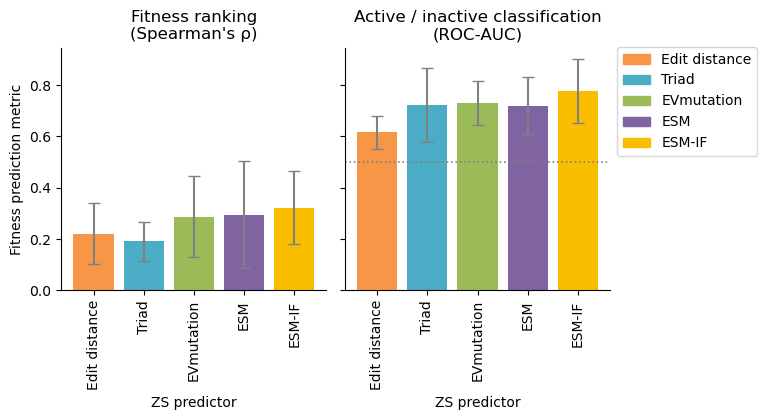

In [53]:
# Plotting
fig, axes = plt.subplots(1,2, figsize=(6, 4), sharey=True)

for m, ax in zip(avg_bar_type_df["metric"].unique(), axes):

    slice_m = avg_bar_type_df[(avg_bar_type_df["metric"] == m) & (avg_bar_type_df["type_"] == "Both")].copy()

        # Perform t-tests between each pair of ZS predictors within the metric
    p_values = {}
    for zs1 in ZS_OPTS[:-1]:
        for zs2 in ZS_OPTS[:-1]:
            if zs1 < zs2:  # To ensure each pair is only tested once
                group1 = slice_m[slice_m['zs'] == zs1]['value']
                group2 = slice_m[slice_m['zs'] == zs2]['value']
                _, p_value = ttest_ind(group1, group2)
                p_values[f"{zs1} vs {zs2}"] = p_value

    means = slice_m[slice_m["calc"] == "mean"]["value"].tolist()

    bars = ax.bar(
        [ZS_OPTS_APPENDED[zs] for zs in ZS_OPTS[:-1]],
        means,
        yerr=slice_m[slice_m["calc"] == "std"]["value"].tolist(),
        capsize=4,
        color=[
            five_zs[c]
            for c in ZS_OPTS[:-1]
        ],
        width=0.8,
        error_kw={'ecolor': 'gray', 'capthick': 1} 
    )

        # Annotating p-values
    for i, (pair, p_value) in enumerate(p_values.items()):
        if p_value < 0.05:
            ax.text(i, max(means) + 10, "*", ha="center", color="gray")



# Show p-values on the bars
# for bar, pvalue in zip(bars, p_dict.values()):
#     y = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width() / 2, y, f'p={pvalue:.3f}', ha='center', va='bottom' if y < 0 else 'top', color='black')
# Hide the top and right spines

    if "classification" in m:
        ax.axhline(0.5, color='gray', linestyle='dotted', lw=1.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)  # Disable the y-axis grid lines

    ax.tick_params(axis='x', rotation=90)

    # Adding labels and titles
    ax.set_title(m)
    ax.set_xlabel("ZS predictor")
    # ax.set_ylabel(m)
axes[0].set_ylabel("Fitness prediction metric")

# Create custom handles for the legend
handles = [mpatches.Patch(color=five_zs[zs], label=ZS_OPTS_APPENDED[zs]) for zs in ZS_OPTS[:-1]]

# Create a figure-wide legend
fig.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 0.925)) # title="ZS Predictor")
plt.tight_layout(pad=.0, h_pad=-.0, w_pad=1.0)
# ax.set_title("MSA correlation with different ZS scores")

/tmp/ipykernel_3987726/1193268399.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90, ha="center")
/tmp/ipykernel_3987726/1193268399.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90, ha="center")
/tmp/ipykernel_3987726/1193268399.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90, ha="center")
/tmp/ipykernel_3987726/1193268399.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90, ha="center")
/tmp/ipykernel_3987726/1193268399.py:47: UserWarning: set_ticklabels() should only be used with a fixed 

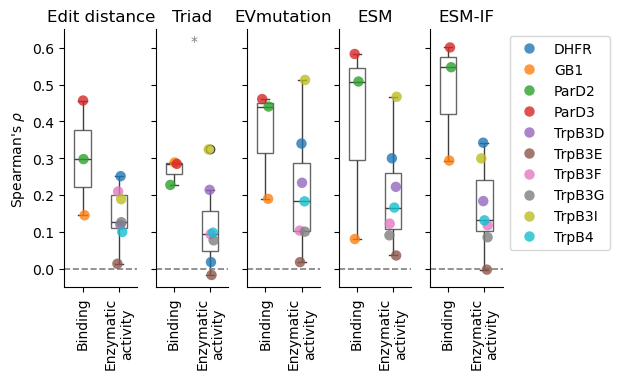

In [14]:
fig, axes = plt.subplots(1, 5, figsize=(6, 3.6), sharey=True)

for z, zs in enumerate(ZS_OPTS[:-1]):
    ax = axes.flatten()[z]
    x = "all_" + zs.split("_")[0] + "_rho"
    bar_type_df = slice_zs[["lib", "type", x]].sort_values(["lib", "type"]).copy()

    sns.boxplot(
        # x="Type", y="Rho",
        x="type",
        y=x,
        data=bar_type_df,
        order=["Binding", "Enzymatic activity"],
        width=0.45,
        ax=ax,
        # color=PRESENTATION_PALETTE_SATURATE["light_gray"],# palette="pastel", showmeans=True
        boxprops={
            "facecolor": "None",
            "edgecolor": PRESENTATION_PALETTE_SATURATE["gray"],
        },
    )
    sns.stripplot(
        # x="Type",
        # y="Rho",
        x="type",
        y=x,
        data=bar_type_df,
        order=["Binding", "Enzymatic activity"],
        hue="lib",
        hue_order=bar_type_df["lib"].unique(),
        jitter=True,
        size=7.5,
        # dodge=True,
        palette=sns.color_palette("tab10").as_hex(),
        marker="o",
        alpha=0.8,
        ax=ax,
    )

    labels = [
        label.get_text()
        .replace("Enzymatic activity", "Enzymatic\nactivity")
        # .replace("Binding", "Binding\ninteraction")
        for label in ax.get_xticklabels()
    ]
    ax.set_xlabel("")
    ax.set_xticklabels(labels, rotation=90, ha="center")
    ax.set_ylim(-0.05, 0.65)
    # ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
    ax.set_title(ZS_OPTS_LEGEND[x.split("_")[1] + "_score"])
    ax.axhline(0, color='gray', lw=1.2, ls='--')

    # Hide the top and right spine
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    if z != len(ZS_OPTS) - 2:
        ax.legend().remove()
    else:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.0))
    if z == 0:
        ax.set_ylabel(r"Spearman's $\rho$")
    else:
        ax.set_ylabel("")

    t_val, p_value = ttest_ind(
        list(bar_type_df[bar_type_df["type"] == "Binding"][x]),
        list(bar_type_df[bar_type_df["type"] == "Enzymatic activity"][x]),
        equal_var=False,
    )
    # significance = '*' if p_value < 0.05 else 'ns'  # ns stands for not significant
    # print(f"Comparison of {ms[i]} between {ens_types[p]} and {ens_types[q]} : t={t_val:.3f} and p={p_value:.3f}")

    # Draw a line between points
    p = 0.1
    q = 1
    annot_y = 0.6
    if p_value < 0.05:
        # ax.plot([p+0.5*(q-p), q-0.5*(q-p)], [annot_y, annot_y], color='gray', lw=1.5)
        ax.text((p + q) * 0.5, annot_y, "*", ha="center", va="bottom", color="gray")
        
    # if z == 2:
    #     ax.set_xlabel("ZS type")
    # else:
    #
    # # plt.title("Triad ZS statistically different for types")
    # plt.ylabel("Type")
    # plt.xlabel(ZS_OPTS_LEGEND[x.split("_")[1]+"_score"] + r"’s fitness prediction Spearman's $\rho$")
    # # plt.legend(title="Group", loc="upper left", bbox_to_anchor=(1, 1.05))
    # plt.legend().remove()
plt.tight_layout(pad=0, h_pad=-0.0, w_pad=1.0)

/tmp/ipykernel_3987726/3733059728.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( labels, rotation=90, ha="center")
/tmp/ipykernel_3987726/3733059728.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( labels, rotation=90, ha="center")


ed_score : t=-2.336 and p=0.056
Triad_score : t=0.741 and p=0.495


/tmp/ipykernel_3987726/3733059728.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( labels, rotation=90, ha="center")


ev_score : t=-2.370 and p=0.046


/tmp/ipykernel_3987726/3733059728.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( labels, rotation=90, ha="center")


esm_score : t=-1.263 and p=0.268


/tmp/ipykernel_3987726/3733059728.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( labels, rotation=90, ha="center")


esmif_score : t=0.195 and p=0.855


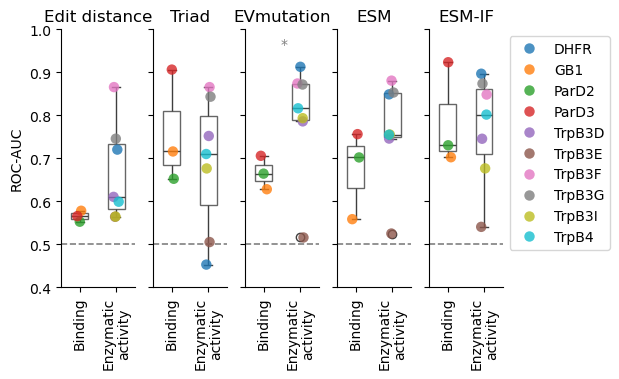

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(6, 3.6), sharey=True)

for z, zs in enumerate(ZS_OPTS[:-1]):
    ax = axes.flatten()[z]
    x = "all_" + zs.split("_")[0] + "_rocauc"
    bar_type_df = slice_zs[["lib", "type", x]].sort_values(["lib", "type"]).copy()

    sns.boxplot(
        # x="Type", y="Rho", 
        x="type", y=x, 
        data=bar_type_df, width=0.45, 
        ax=ax,
        order=["Binding", "Enzymatic activity"],
        # color=PRESENTATION_PALETTE_SATURATE["light_gray"],# palette="pastel", showmeans=True
        boxprops={'facecolor': 'None', 'edgecolor': PRESENTATION_PALETTE_SATURATE["gray"]},
    )
    sns.stripplot(
        # x="Type",
        # y="Rho",
        x="type",
        y=x,
        data=bar_type_df,
        order=bar_type_df['type'].unique(),
        hue="lib",
        hue_order=bar_type_df['lib'].unique(),
        jitter=True,
        size=7.5,
        # dodge=True,
        palette=sns.color_palette("tab10").as_hex(),
        marker="o",
        alpha=0.8,
        ax=ax
    )

    labels = [label.get_text().replace('Enzymatic activity', 'Enzymatic\nactivity') for label in ax.get_xticklabels()]
    ax.set_xlabel("")
    ax.set_xticklabels( labels, rotation=90, ha="center")
    ax.set_ylim(0.4, 1)
    # ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
    ax.set_title(ZS_OPTS_LEGEND[x.split("_")[1]+"_score"])
    
    # Hide the top and right spine
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axhline(0.5, color='gray', lw=1.2, ls='--')
    
    
    if z != len(ZS_OPTS)-2:
        ax.legend().remove()
    else:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.0))
    if z == 0:
        ax.set_ylabel("ROC-AUC")
    else:
        ax.set_ylabel("")

    t_val, p_value = ttest_ind(
        list(bar_type_df[bar_type_df["type"]=="Binding"][x]),
        list(bar_type_df[bar_type_df["type"]=="Enzymatic activity"][x]),
        equal_var=False,
    )

    
    # significance = '*' if p_value < 0.05 else 'ns'  # ns stands for not significant
    print(f"{zs} : t={t_val:.3f} and p={p_value:.3f}")

    # Draw a line between points
    p = 0.1
    q = 1
    annot_y = 0.95
    if p_value < 0.05:
        # ax.plot([p+0.5*(q-p), q-0.5*(q-p)], [annot_y, annot_y], color='gray', lw=1.5)
        ax.text((p+q)*.5, annot_y, "*", ha='center', va='bottom', color='gray')

    # if z == 2:
    #     ax.set_xlabel("ZS type")
    # else:
    #     
    # # plt.title("Triad ZS statistically different for types")
    # plt.ylabel("Type")
    # plt.xlabel(ZS_OPTS_LEGEND[x.split("_")[1]+"_score"] + r"’s fitness prediction Spearman's $\rho$")
    # # plt.legend(title="Group", loc="upper left", bbox_to_anchor=(1, 1.05))
    # plt.legend().remove()
plt.tight_layout(pad=0, h_pad=-.0, w_pad=1.0)

In [18]:
get_msa_dict = {}

for l, v in EV_META.items():
    if l != "TrpB":
        if "chosen" in v.keys():
            get_msa_dict[l] = v["chosen"]["sequences"]
        else:
            get_msa_dict[l] = v["recommended"]["sequences"]
    else:
        ls = [l+ "3"+ app for app in [chr(i) for i in range(ord('A'), ord('I')+1)]]+ ["TrpB4"]
        for t in ls:
            if "chosen" in v.keys():
                get_msa_dict[t] = v["chosen"]["sequences"]
            else:
                get_msa_dict[t] = v["recommended"]["sequences"]

msa_df = pd.DataFrame(get_msa_dict, index=["MSA"]).T.reset_index()
msa_df.columns=["lib", "msa"]
msa_df

,lib,msa
0,DHFR,16042
1,ParD2,6789
2,ParD3,6784
3,GB1,29
4,TrpB3A,5816
5,TrpB3B,5816
6,TrpB3C,5816
7,TrpB3D,5816
8,TrpB3E,5816
9,TrpB3F,5816


In [19]:
zs_append_msa = pd.merge(zs_df, msa_df, on="lib")
zs_append_msa

,lib,all_ed_rho,all_ed_ndcg,all_ed_rocauc,all_Triad_rho,all_Triad_ndcg,all_Triad_rocauc,all_ev_rho,all_ev_ndcg,all_ev_rocauc,...,single_msanoif-comb_ndcg,single_msanoif-comb_rocauc,single_msa-comb_rho,single_msa-comb_ndcg,single_msa-comb_rocauc,single_structnmsa-comb_rho,single_structnmsa-comb_ndcg,single_structnmsa-comb_rocauc,type,msa
0,DHFR,0.251154,0.914803,0.719973,0.017801,0.874707,0.452238,0.339650,0.947058,0.912765,...,0.891175,0.917361,0.553279,0.891577,0.911111,-0.212895,0.800908,0.320833,Enzymatic activity,16042
1,GB1,0.144928,0.687396,0.577572,0.288282,0.764049,0.715632,0.189509,0.721558,0.627690,...,0.686378,0.588512,0.774073,0.784778,0.897363,0.811746,0.786033,0.916196,Binding,29
2,ParD2,0.297520,0.902898,0.552103,0.227370,0.843746,0.652049,0.440248,0.915307,0.664011,...,0.969377,0.842105,0.676766,0.976464,0.947368,0.687594,0.988024,0.964912,Binding,6789
3,ParD3,0.456627,0.953525,0.564976,0.284501,0.886169,0.906254,0.460576,0.955882,0.705520,...,0.993785,NaN,0.369282,0.995510,NaN,0.337783,0.993260,NaN,Binding,6784
4,TrpB3A,0.146519,0.672480,0.608694,-0.016552,0.488693,0.664616,0.105892,0.743685,0.657328,...,0.887328,0.862269,0.490425,0.892182,0.850694,0.097446,0.525140,0.646991,Enzymatic activity,5816
5,TrpB3B,0.048451,0.638318,0.551217,0.041425,0.348852,0.653659,0.056590,0.672504,0.583225,...,0.914430,0.975309,0.373545,0.924416,0.981481,0.155952,0.795325,0.796296,Enzymatic activity,5816
6,TrpB3C,0.055999,0.646208,0.605496,0.043581,0.680187,0.621564,0.050793,0.660263,0.539872,...,0.873296,0.981818,0.380206,0.942209,1.000000,0.336462,0.934191,0.996970,Enzymatic activity,5816
7,TrpB3D,0.119253,0.750375,0.609910,0.213946,0.761741,0.751696,0.233182,0.822937,0.785684,...,0.875823,0.745658,0.408905,0.854952,0.682382,0.386136,0.814950,0.699132,Enzymatic activity,5816
8,TrpB3E,0.013191,0.728204,0.563633,-0.017332,0.593711,0.504706,0.017571,0.852058,0.515337,...,0.938319,0.991392,0.692477,0.914564,0.958393,-0.076301,0.511023,0.467719,Enzymatic activity,5816
9,TrpB3F,0.209446,0.763770,0.865507,0.093448,0.688977,0.865511,0.103260,0.804297,0.873863,...,0.872552,0.617246,0.375107,0.868215,0.634615,0.500940,0.903963,0.714640,Enzymatic activity,5816


In [20]:
zs_metric_map = {
    "rho": "Fitness ranking\n(Spearman's ρ)",
    "rocauc": "Active / inactive classification\n(ROC-AUC)"
}


In [22]:
slice_zs = zs_append_msa[zs_append_msa["lib"].isin(active_lib_list)]

# rho_dict = {}
# p_dict = {}

# rho_dict_bind = {}
# p_dict_bind = {}

# rho_dict_ea = {}
# p_dict_ea = {}

df_msa = pd.DataFrame()

for zs in ZS_OPTS[:-1]:
    for m in ["rho", "rocauc"]:
        zs_col = "all_" + zs.replace("score", m)

        # for t in ["Binding", "Enzymatic activity"]:
        #     type_df = slice_zs[slice_zs["type"] == t]
            
        #     zs_rho_ea, zs_p_ea = spearmanr(type_df[zs_col], type_df["msa"])
        #     df_msa = df_msa._append({"type":t, "zs": zs, "metric": m, "value": zs_rho_ea, "p": zs_p_ea}, ignore_index=True)

        zs_rho_both, zs_p_both= spearmanr(slice_zs[zs_col], slice_zs["msa"])
        df_msa = df_msa._append({"type": "Both", "zs": zs, "metric": m, "value": zs_rho_both, "p": zs_p_both}, ignore_index=True)

df_msa["zs"] = df_msa["zs"].map(ZS_OPTS_LEGEND)
df_msa["metric"] = df_msa["metric"].map(zs_metric_map)
df_msa = df_msa.replace({"Binding": "Binding interaction"})

df_msa

,type,zs,metric,value,p
0,Both,Edit distance,Fitness ranking\n(Spearman's ρ),0.641821,0.045440
1,Both,Edit distance,Active / inactive classification\n(ROC-AUC),-0.136558,0.706788
2,Both,Triad,Fitness ranking\n(Spearman's ρ),-0.218492,0.544219
3,Both,Triad,Active / inactive classification\n(ROC-AUC),-0.300427,0.398988
4,Both,EVmutation,Fitness ranking\n(Spearman's ρ),0.457468,0.183728
5,Both,EVmutation,Active / inactive classification\n(ROC-AUC),0.279943,0.433400
6,Both,ESM,Fitness ranking\n(Spearman's ρ),0.710100,0.021396
7,Both,ESM,Active / inactive classification\n(ROC-AUC),0.273115,0.445165
8,Both,ESM-IF,Fitness ranking\n(Spearman's ρ),0.594026,0.070171
9,Both,ESM-IF,Active / inactive classification\n(ROC-AUC),0.505264,0.136307


Fitness ranking
(Spearman's ρ) ed_score: rho=0.642, p=0.045
is significant!
Fitness ranking
(Spearman's ρ) Triad_score: rho=-0.218, p=0.544
Fitness ranking
(Spearman's ρ) ev_score: rho=0.457, p=0.184
Fitness ranking
(Spearman's ρ) esm_score: rho=0.710, p=0.021
is significant!
Fitness ranking
(Spearman's ρ) esmif_score: rho=0.594, p=0.070
Active / inactive classification
(ROC-AUC) ed_score: rho=-0.137, p=0.707
Active / inactive classification
(ROC-AUC) Triad_score: rho=-0.300, p=0.399
Active / inactive classification
(ROC-AUC) ev_score: rho=0.280, p=0.433
Active / inactive classification
(ROC-AUC) esm_score: rho=0.273, p=0.445
Active / inactive classification
(ROC-AUC) esmif_score: rho=0.505, p=0.136


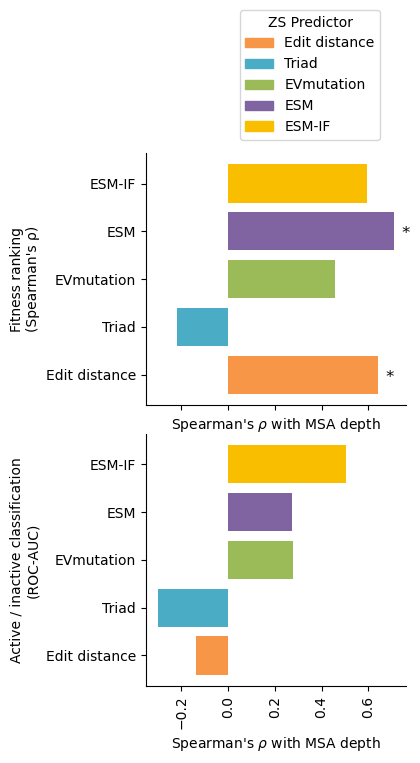

In [45]:
fig, axes = plt.subplots(2, 1, figsize=(4, 6), sharex=True)

for i, (m, ax) in enumerate(zip(df_msa["metric"].unique(), axes)):
    # Filter for the specific metric and type
    slice_m = df_msa[(df_msa["metric"] == m) & (df_msa["type"] == "Both")].copy()

    # Plot the bars
    bars = ax.barh(
        [ZS_OPTS_APPENDED[zs] for zs in ZS_OPTS[:-1]],
        slice_m["value"],
        color=[five_zs[c] for c in ZS_OPTS[:-1]],
        height=0.8
    )

    # Annotate p-values on the bars
    for j, bar in enumerate(bars):
        # Get the p-value corresponding to this bar
        p_val = slice_m["p"].values[j]  # Assuming the p-values are in the "p" column
        rho_val = slice_m["value"].values[j]  # Corresponding rho value

        print(f"{m} {ZS_OPTS[j]}: rho={rho_val:.3f}, p={p_val:.3f}")

        # Annotate the p-value or a significance marker
        if p_val < 0.05:
            print("is significant!")
            ax.text(
                bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2 - 0.05,
                "*", ha="center", va="center", color="black", fontsize=12
            )
        # else:
        #     ax.text(
        #         bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2,
        #         f"p={p_val:.3f}", ha="left", va="center", color="black"
        #     )

    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)  # Disable the y-axis grid lines

    ax.set_xlabel(r"Spearman's $\rho$ with MSA depth")
    
    # Adding labels and titles
    ax.set_ylabel(m)
    ax.tick_params(axis='x', rotation=90)

# Create custom handles for the legend
handles = [mpatches.Patch(color=five_zs[zs], label=ZS_OPTS_APPENDED[zs]) for zs in ZS_OPTS[:-1]]

# Create a figure-wide legend
fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.75, 1.25), title="ZS Predictor")
plt.tight_layout(pad=.0, h_pad=-.0, w_pad=1.0)

plt.show()
